# 线性回归算法
* 练习随机梯度下降算法
* 练习正则方程算法优化模型

In [386]:
import os 
import sys 
import gc 
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import random 
import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split



In [387]:
# perpre the dataset 
df_o = pd.read_csv('./train.csv')
df_o

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [388]:
drops = []
for col in df_o.columns :
    if df_o[col].dtype == 'object' :
        drops.append(col)
df = df_o.drop(drops, axis=1); del drops ; gc.collect()

7307

In [389]:
y = df['SalePrice'].values
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.25, random_state=24, shuffle=True)
X_train = np.nan_to_num(X_train.to_numpy())[:, : 1]
x_val = np.nan_to_num(X_val.to_numpy())

y_train = (y_train - np.mean(y_train)) / np.std(y_train)
#y_val = (y_val - np.mean(y_val)) / np.std(y_val)

In [390]:
X_train.shape, X_val.shape

((1095, 1), (365, 38))

In [391]:
y_train.shape

(1095,)

In [392]:
# check 
np.mean(y_train), np.std(y_train) 

(1.8006904947345005e-16, 1.0)

# LMS Algorithm Gradient decent Linear Model

In [393]:
class LMS(object):
    def __init__(self, theta_inital, alpha):
        """ 
        theta: shape(feature_num, )
        X: shape(batch, feature_num)
        y: shape(feature_num, )
        """
        super().__init__()
        self.alpha = alpha # float
        self.theta_0 = 0.0 # float
        self.theta_inital = theta_inital # shape(feature_num, )



    def h(self, X):
        #print(np.dot(X, self.theta_inital))
        return np.dot(X, self.theta_inital) + self.theta_0 # shape(batch, )
    
        
    def J(self, pred, y):
        # pred shape(batch, )
        # y shape(batch, )
        loss = np.sum(((y - pred) ** 2) / (2 * len(y)), axis=0)
        #print(loss)
        return loss #(1 / 2) * np.sum((pred - y)**2, axis=0) # float



    def lms(self, X, y, pred):
        # theta shape(feature_num, )
        for j in range(X.shape[1]): # feature_level
            X_j = X[:, j] # shape(batch, )
            gradient = np.sum((y - pred)*X_j, axis=0) / len(y)
            self.theta_inital[j] += self.alpha * gradient

        # update the basis
        self.theta_0 += self.alpha * ( np.sum((y - pred), axis=0) / len(y) )
        return self.theta_inital
    

    def fit(self, X, y, epochs:int):

        loss_best = np.inf
        history_losses = []
        for epoch in range(epochs):
            # Forward
            pred = self.h(X)
            #print(pred)
            # Calculate the loss
            loss = self.J(pred=pred, y=y)
            # Update the parameters
            the = self.lms(X=X, y=y, pred=pred)
            #print(the)
            if loss < loss_best:
                loss_best = loss
            history_losses.append(loss)
            print(f'Train Loss: {loss}')
        gc.collect()
        return history_losses

In [394]:
theta = np.zeros(X_train.shape[1])
model = LMS(theta, alpha=0.01)

In [395]:
losses = model.fit(X_train, y_train, epochs=10)

Train Loss: 0.49999999999999994
Train Loss: 11815.399916325236
Train Loss: 586842315175.4734
Train Loss: 2.914827025888992e+19
Train Loss: 1.447785268913273e+27
Train Loss: 7.191103164150868e+34
Train Loss: 3.571797961190494e+42
Train Loss: 1.7741006330105981e+50
Train Loss: 8.811901149637125e+57
Train Loss: 4.376843141034618e+65


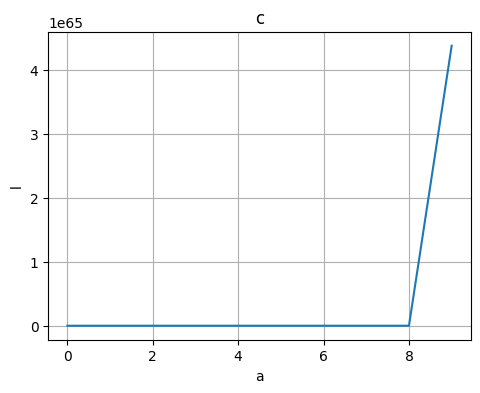

In [396]:

# 可视化结果
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.xlabel('a')
plt.ylabel('l')
plt.title('c')
plt.grid(True)

(1000, 1)
Train Loss: 181.59042878849937
Train Loss: 179.06029717430795
Train Loss: 176.57847011148328
Train Loss: 174.14402497561628
Train Loss: 171.75605677266893
Train Loss: 169.41367780191595
Train Loss: 167.1160173253332
Train Loss: 164.8622212433099
Train Loss: 162.65145177656368
Train Loss: 160.48288715413923
Train Loss: 158.35572130737532
Train Loss: 156.26916356972416
Train Loss: 154.22243838231307
Train Loss: 152.214785005137
Train Loss: 150.24545723377508
Train Loss: 148.3137231215252
Train Loss: 146.4188647068528
Train Loss: 144.56017774605252
Train Loss: 142.73697145102244
Train Loss: 140.9485682320539
Train Loss: 139.19430344553984
Train Loss: 137.47352514650865
Train Loss: 135.7855938458905
Train Loss: 134.12988227242556
Train Loss: 132.50577513912594
Train Loss: 130.91266891420344
Train Loss: 129.34997159637817
Train Loss: 127.81710249448409
Train Loss: 126.31349201128907
Train Loss: 124.83858143144926
Train Loss: 123.39182271351822
Train Loss: 121.97267828593334
Train 

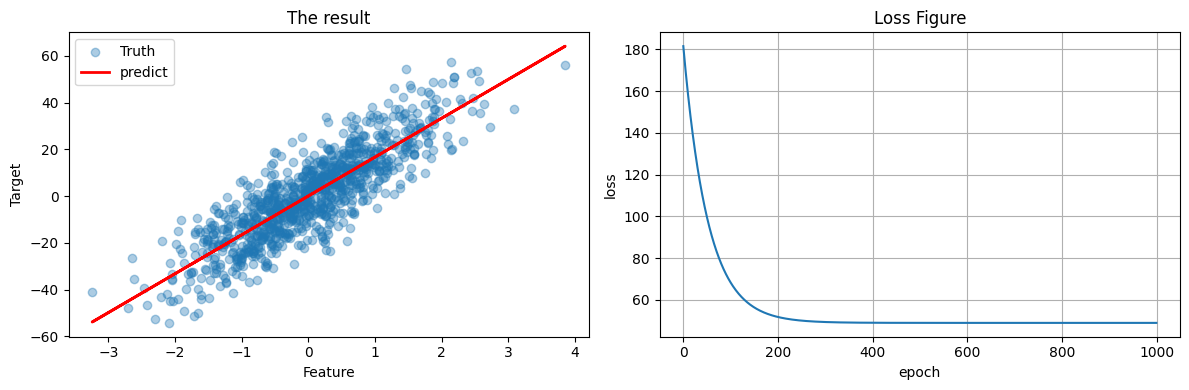


训练完成!
最终权重: [16.63243391]
最终偏置: 0.0454


In [403]:
# 使用生成的数据集
from sklearn.datasets import make_regression

def main():
    # 生成示例数据
    X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)
    print(X.shape)
    # 初始化参数
    initial_theta = np.zeros(X.shape[1])
    alpha = 0.01
    epochs = 1000
    
    # 创建并训练模型
    model = LMS(initial_theta, alpha=alpha)
    losses_ = model.fit(X, y, epochs)
    
    # 预测
    predictions = model.h(X)
    
    # 可视化结果
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, alpha=0.37, label='Truth')
    plt.plot(X, predictions, color='red', linewidth=2, label='predict')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.title('The result')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(losses_)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss Figure')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # 打印最终参数
    print(f"\n训练完成!")
    print(f"最终权重: {model.theta_inital}")
    print(f"最终偏置: {model.theta_0:.4f}")

if __name__ == "__main__":
    main()